In [2]:
%load_ext autoreload

In [3]:
%autoreload 2
%matplotlib inline

In [4]:
import pandas as pd 
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from SepMe.processing.sampling import *
import os

folder = '../../data/orig_data/graph_results/'


SepMe - INFO - MLFLOW_TRACKING_URI - http://localhost:5000
/Users/morarica/miniconda3/envs/SepMe/lib/python3.7/site-packages/botocore/awsrequest.py:624: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working



## Sample by KNN

Index(['index', 'knn_2_ltcc_all', 'knn_2_ltcc_0', 'knn_2_ltcc_1',
       'knn_2_ltcc_2', 'knn_2_mcec', 'knn_2_cp_a', 'knn_2_ce_a',
       'knn_2_mv_a_true', 'knn_2_mv_a_false',
       ...
       'knn_6_mv_7_true', 'knn_6_mv_7_false', 'knn_6_cp_8', 'knn_6_ce_8',
       'knn_6_mv_8_true', 'knn_6_mv_8_false', 'knn_6_cp_9', 'knn_6_ce_9',
       'knn_6_mv_9_true', 'knn_6_mv_9_false'],
      dtype='object', length=169)
(22208, 169)


<string>:6: DeprecationWarning:

object of type <class 'float'> cannot be safely interpreted as an integer.



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)


,index,knn_2_ltcc_all,knn_2_ltcc_0,knn_2_ltcc_1,knn_2_ltcc_2,knn_2_mcec,knn_2_cp_a,knn_2_ce_a,knn_2_mv_a_true,knn_2_mv_a_false,...,knn_6_mv_7_false,knn_6_cp_8,knn_6_ce_8,knn_6_mv_8_true,knn_6_mv_8_false,knn_6_cp_9,knn_6_ce_9,knn_6_mv_9_true,knn_6_mv_9_false,name
12697,JavierGeneratedData_3dinterleaved_3classes_X-Y,0.105603,0.308824,0.276596,0.262032,1.0,0.905172,0.081163,0.859914,0.950431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JavierGeneratedData_3dinterleaved_3classes
12711,JavierGeneratedData_3dinterleaved_3classes_X-Z,0.151188,0.389706,0.372340,0.230216,1.0,0.893089,0.091349,0.842333,0.943844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JavierGeneratedData_3dinterleaved_3classes
12726,JavierGeneratedData_3dinterleaved_3classes_Y-Z,0.350318,0.859375,0.148936,0.246377,1.0,0.891720,0.095948,0.834395,0.949045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JavierGeneratedData_3dinterleaved_3classes
11210,JavierGeneratedData_3dinterleaved_3classes_iso1-X,0.165584,0.228346,0.439655,0.446154,1.0,0.995130,0.003762,0.993506,0.996753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JavierGeneratedData_3dinterleaved_3classes
11231,JavierGeneratedData_3dinterleaved_3classes_iso1-Y,0.137546,0.274074,0.220779,0.175439,1.0,0.886617,0.109845,0.810409,0.962825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JavierGeneratedData_3dinterleaved_3classes


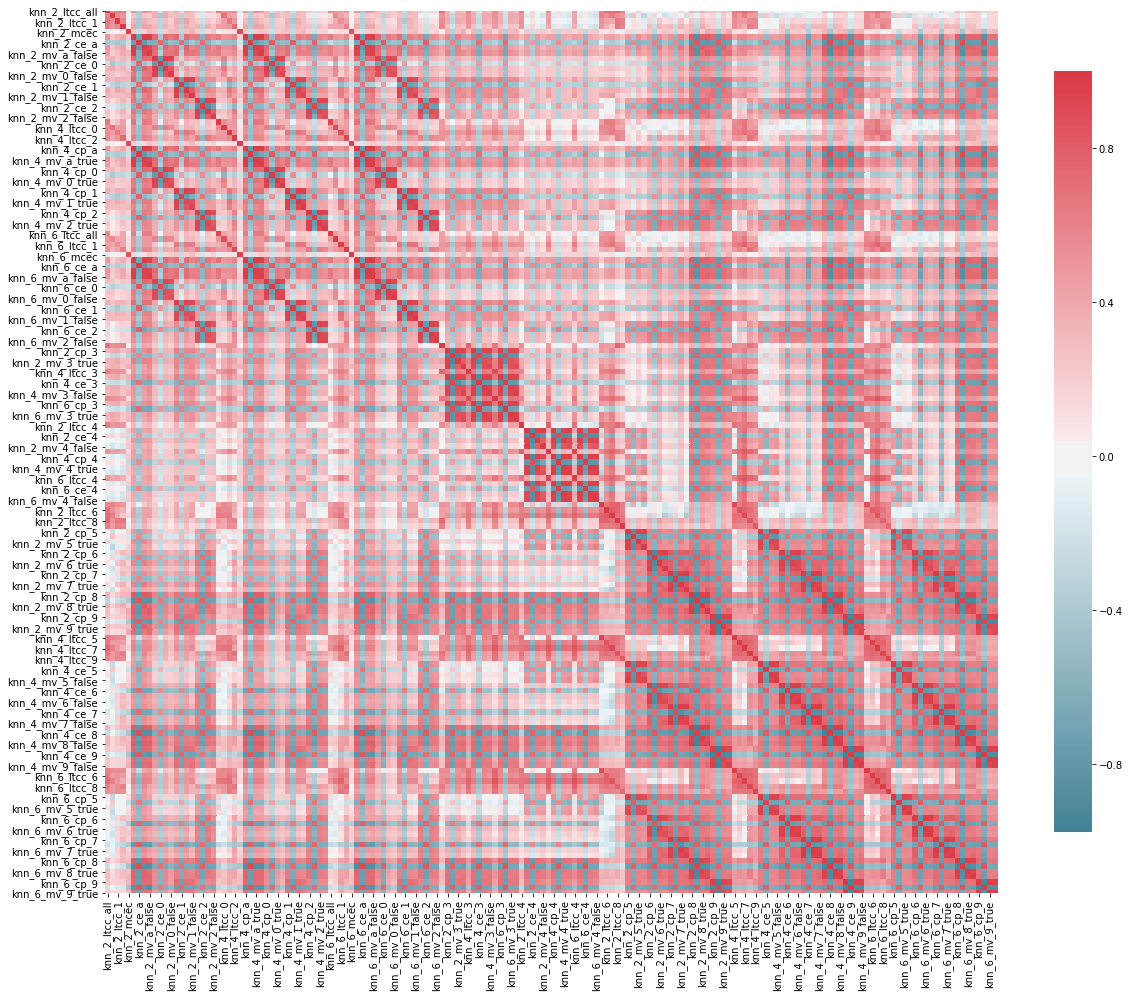

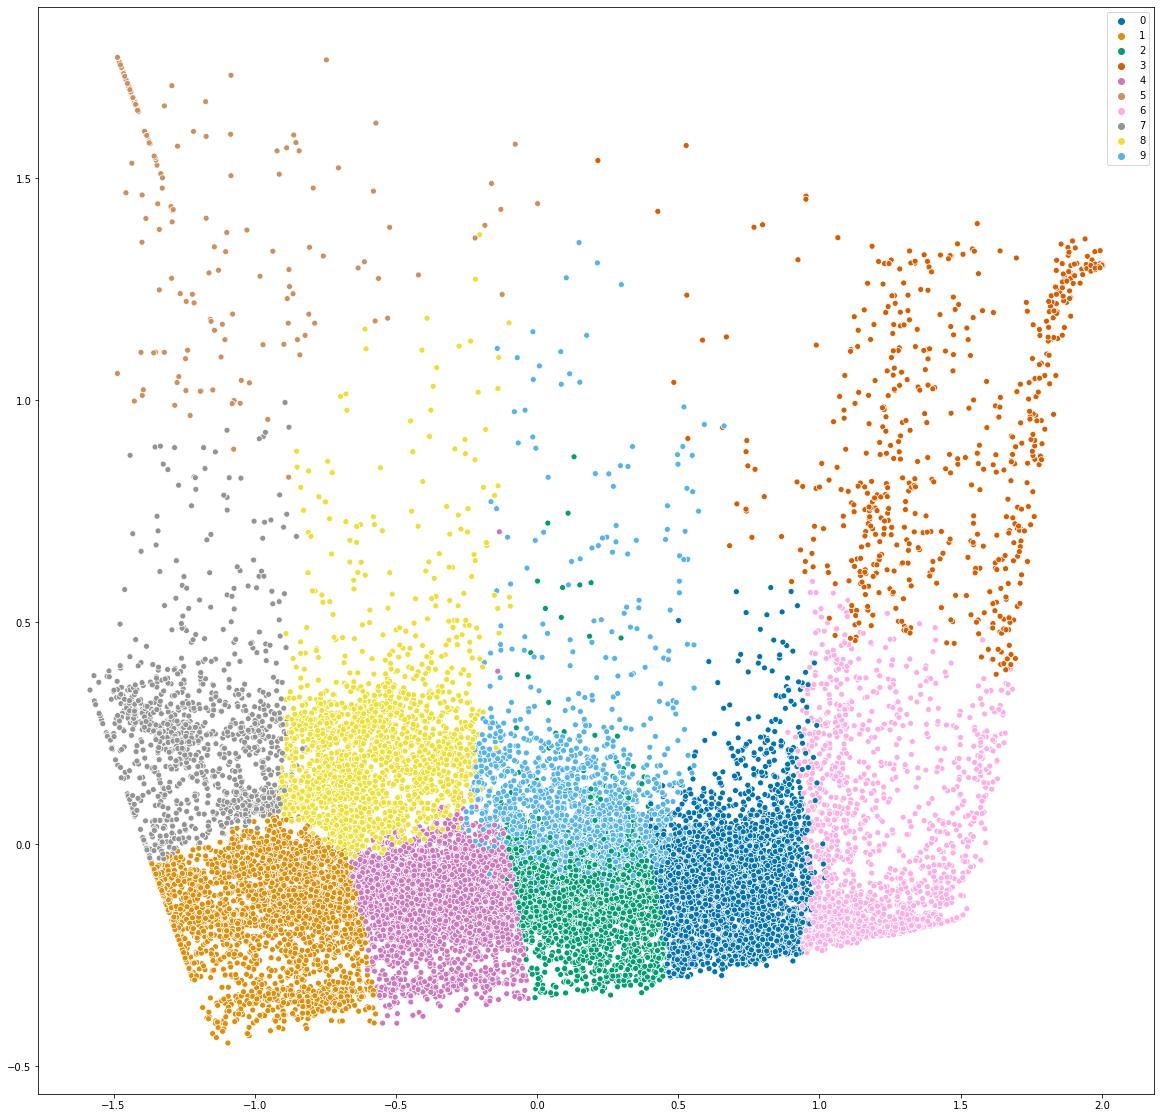

In [4]:
df = pd.read_csv(folder+ 'res_sampling_data.csv', index_col=0).reset_index().sort_values(['index'])
print(df.columns)
print(df.shape)

df['name'] = ['_'.join(idx.split('_')[:-1]) for idx in df['index']]



corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap,  center=0,
            square=True,  cbar_kws={"shrink": .7})

pca = PCA()
nn = pca.fit_transform(df.iloc[:, 1:-1].dropna(axis=1))




kmeans = KMeans(n_clusters=10, random_state=0).fit(df.iloc[:, 1:-1].dropna(axis=1))
print(kmeans)

f1, ax1 = plt.subplots(figsize=(20, 20))
sns.scatterplot(nn[:,0],nn[:,1],hue=kmeans.labels_, palette= sns.color_palette('colorblind') )

#df['pca1'] = nn[:,0]
#df['pca1'] = nn[:,1]

df.head()


## Sample by Michael


,index,M,A,class,dim_x,dim_y,fileName,MA
0,JavierGeneratedData_3dinterleaved_3classes_PCA_1,4,5,1,1,2,JavierGeneratedData_3dinterleaved_3classes_PCA,4.5
1,JavierGeneratedData_3dinterleaved_3classes_PCA_2,4,5,2,1,2,JavierGeneratedData_3dinterleaved_3classes_PCA,4.5
2,JavierGeneratedData_3dinterleaved_3classes_PCA_3,4,5,3,1,2,JavierGeneratedData_3dinterleaved_3classes_PCA,4.5
3,JavierGeneratedData_3dinterleaved_3classes_Rob...,4,5,1,1,2,JavierGeneratedData_3dinterleaved_3classes_RobPCA,4.5
4,JavierGeneratedData_3dinterleaved_3classes_Rob...,4,5,2,1,2,JavierGeneratedData_3dinterleaved_3classes_RobPCA,4.5


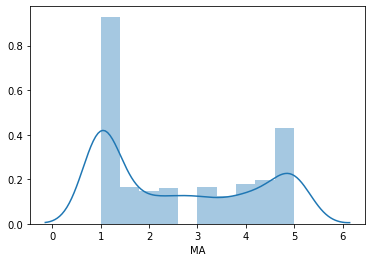

In [5]:
df_human = pd.read_csv('../../data/orig_data/human_reduced_results.csv')
df_human['MA'] = (df_human['M']+df_human['A'])/2
sns.distplot(df_human['MA'], bins=10)
df_human.head()

,index,class,MA
0,ms_interleaved_40_80_3d_0_GlimmerMDS,3,5.000000
1,ms_interleaved_40_80_3d_0_PCA,3,5.000000
2,ms_interleaved_40_80_3d_0_RobPCA,3,5.000000
3,ms_interleaved_40_80_3d_0_tSNE,3,3.833333
4,ms_interleaved_40_80_3d_50_GlimmerMDS,3,1.500000


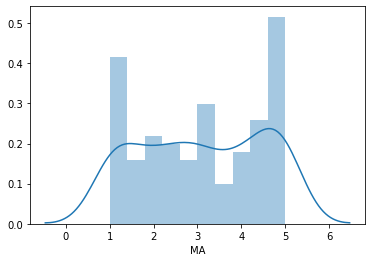

In [6]:
dfh = df_human.groupby('fileName').agg({'class': 'max', 'MA': 'mean'}).reset_index().sort_values(['class'])
dfh = dfh.rename(columns = {'fileName':'index'})
dfh = dfh.loc[dfh['class']>2,:]
sns.distplot(dfh['MA'], bins=10)
dfh.reset_index(drop=True, inplace=True)

dfh.head()

In [7]:
idx = get_samples(dfh, dfh.MA, 100)
create_sample_from_index(dfh, idx,
                         fig_folder = '../../data/orig_data/figures/reduced_data/',
                         csv_folder = '../../data/orig_data/input_data/Reduced_orig_data/reduced_clean/',
                         save_folder= "../../data/mturk_samples/sample_abstract/")

TypeError: create_sample_from_index() got an unexpected keyword argument 'name'

In [19]:
create_s3_batchfile(save_folder= "../../data/mturk_samples/sample_abstract/", 
                    bucket_name='scatterplots',
                    name = 'index_other.csv')

Processing file grid10_3d_RobPCA_1-2.csv
(800, 3)
Processing file tse300_tSNE_1-2.csv
(194, 4)
Processing file ms_interleaved_60_120_3d_25_centeredClusters_tSNE_1-2.csv
(233, 3)
Processing file white_ballance_GlimmerMDS_1-2.csv
(4419, 4)
Processing file iris_RobPCA_1-2.csv
(114, 4)
Processing file olive_tSNE_1-2.csv
(446, 4)
Processing file grid6_4d_RobPCA_1-2.csv
(59, 4)
Processing file interleaved_100_200_6d_0_notcramped_notrotated_PCA_1-2.csv
(667, 4)
Processing file tse300_RobPCA_1-2.csv
(198, 4)
Processing file olive_RobPCA_1-2.csv
(452, 4)
Processing file interleaved_100_200_5d_25_cramped_rotated_PCA_1-2.csv
(556, 4)
Processing file interleaved_100_200_4d_25_cramped_rotated_tSNE_1-2.csv
(430, 4)
Processing file n100-d5-c3-spr0.2-out0_tSNE_1-2.csv
(80, 4)
Processing file ms_interleaved_40_80_3d_50_RobPCA_1-2.csv
(161, 3)
Processing file n100-d5-c3-spr0.1-out0_GlimmerMDS_1-2.csv
(80, 4)
Processing file iris_tSNE_1-2.csv
(115, 4)
Processing file hiv_GlimmerMDS_1-2.csv
(61, 4)
Proces

In [35]:
folder = "../../data/mturk_samples/"
dirs = os.listdir(folder)
dfs = []
for dd in dirs:
    if dd.startswith('.'):
        continue
    df = pd.read_csv(folder+dd+'/index.csv')
    df['file_name'] = [row.split('/')[-1]  for i,row in df['image_url'].items()]
    df['exp_name'] = dd
    dfs.append(df)
    
df = pd.concat(dfs, axis=0)


idx=df.groupby(['file_name']).agg({'image_url':'count'}).reset_index().sort_values('image_url', ascending=False)
idx[idx['image_url']==2].shape
idx.rename(columns={"image_url": "counts"}, inplace=True)


index = pd.read_csv(folder+'sample_abstract/index.csv')
index['file_name'] = [row.split('/')[-1]  for i,row in index['image_url'].items()]

index.merge(idx.loc[idx['counts']==1], on='file_name').to_csv(folder+'sample_abstract/index.csv', index=False)



## Cost Estimation

In [9]:
# 5 annotations

total_euros = 200
cost_per_task = .06
exps = 1
annotations=20
scatterplots = 100

print((total_euros/cost_per_task)/(exps*annotations))
print(cost_per_task*exps*annotations*scatterplots)

166.66666666666669
120.0
